In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm

# Optional: nicer dataframe display
pd.set_option("display.max_columns", 50)

# Optional: inline plots (usually default in VS Code notebooks)
%matplotlib inline

Matplotlib is building the font cache; this may take a moment.


In [2]:
np.random.seed(0)
n = 200

x = np.random.lognormal(mean=1.0, sigma=0.5, size=n)  # strictly > 0
y = 2.0 + 0.8 * np.log(x) + np.random.normal(0, 0.3, size=n)

df = pd.DataFrame({"x": x, "y": y})
df["lnx"] = np.log(df["x"])

df.head()

,x,y,lnx
0,6.566797,3.394866,1.882026
1,3.320378,2.888249,1.200079
2,4.434297,3.521393,1.489369
3,8.334859,3.892936,2.120447
4,6.915595,3.739063,1.933779


In [3]:
X = sm.add_constant(df["lnx"])        # adds intercept
model = sm.OLS(df["y"], X).fit()

model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.699
Model:                            OLS   Adj. R-squared:                  0.697
Method:                 Least Squares   F-statistic:                     459.7
Date:                Fri, 16 Jan 2026   Prob (F-statistic):           1.63e-53
Time:                        00:26:05   Log-Likelihood:                -30.737
No. Observations:                 200   AIC:                             65.47
Df Residuals:                     198   BIC:                             72.07
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.9182      0.045     42.314      0.000       1.829       2.008
lnx            0.8419      0.039     21.442      0.000       0.764       0.919
==============================================================================
Omnibus:                        0.111   Durbin-Watson:                   2.249
Prob(Omnibus):                  0.946   Jarque-Bera (JB):                0.008
Skew:                          -0.004   Prob(JB):                        0.996
Kurtosis:                       3.031   Cond. No.                         4.34
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

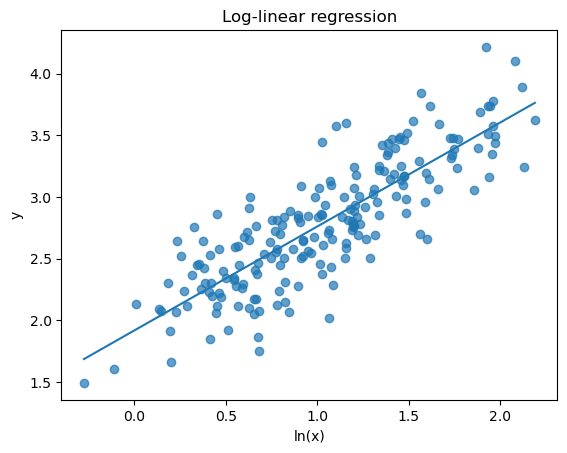

In [4]:
plt.figure()
plt.scatter(df["lnx"], df["y"], alpha=0.7)

lnx_grid = np.linspace(df["lnx"].min(), df["lnx"].max(), 200)
yhat = model.params["const"] + model.params["lnx"] * lnx_grid
plt.plot(lnx_grid, yhat)

plt.xlabel("ln(x)")
plt.ylabel("y")
plt.title("Log-linear regression")
plt.show()